<a href="https://colab.research.google.com/github/35Upesh/Machine-Learning-Algorithms/blob/main/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# Import data
df_sal = pd.read_csv('Salary_Data.csv')

In [3]:
df_sal.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
# Analyze data
df_sal.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
df_sal.shape

(30, 2)

<ipython-input-7-19f1e8b70ed7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_sal['Salary'])


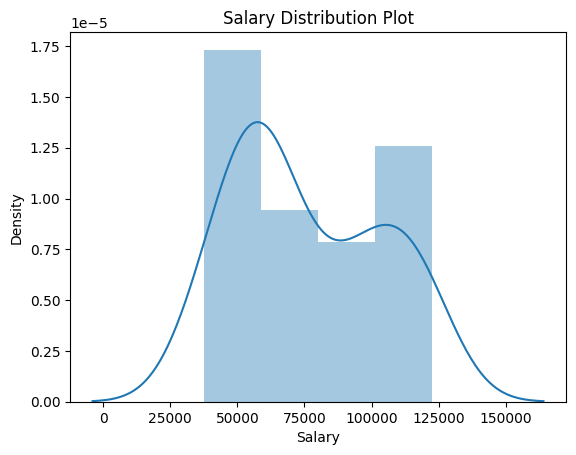

In [ ]:
# Distribution
plt.title('Salary Distribution Plot')
sns.distplot(df_sal['Salary'])
plt.show()

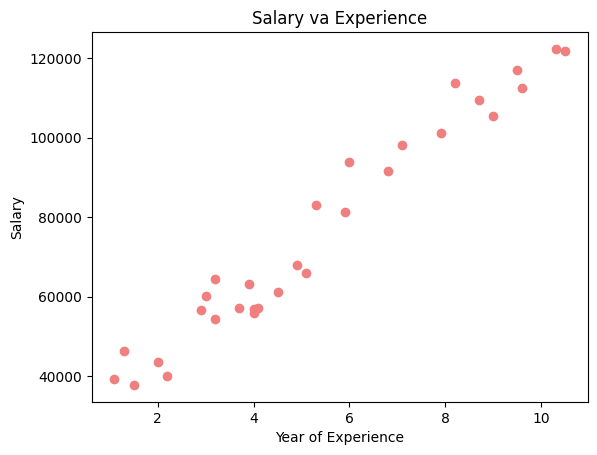

In [7]:
# Relationship between salary and experience
plt.scatter(df_sal['YearsExperience'],df_sal['Salary'],color='lightcoral')
plt.title('Salary va Experience')
plt.xlabel('Year of Experience')
plt.ylabel('Salary')
plt.show()

In [8]:
# Split the data into dependent ans independent
X = df_sal.iloc[:,:1]
Y = df_sal.iloc[:,1:]

In [9]:
# Split in train and test
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [10]:
# Train model
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [11]:
# Predict result
y_pred_test = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

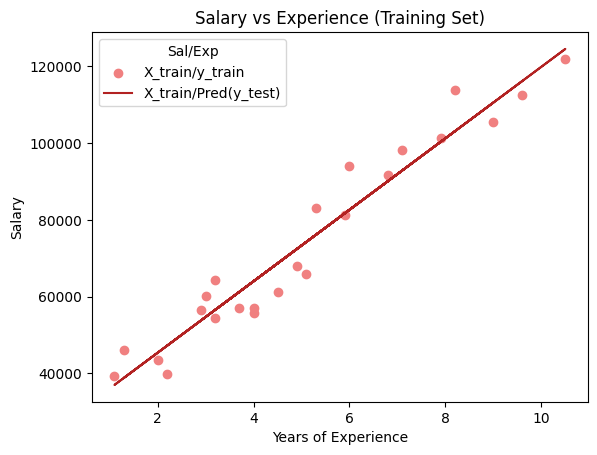

In [22]:
# Visualise prediction on training set
plt.scatter(X_train, y_train, color='lightcoral')
plt.plot(X_train, y_pred_train, color='firebrick')
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(['X_train/y_train', 'X_train/Pred(y_test)'], title = 'Sal/Exp', loc='best', facecolor='white')
plt.show()

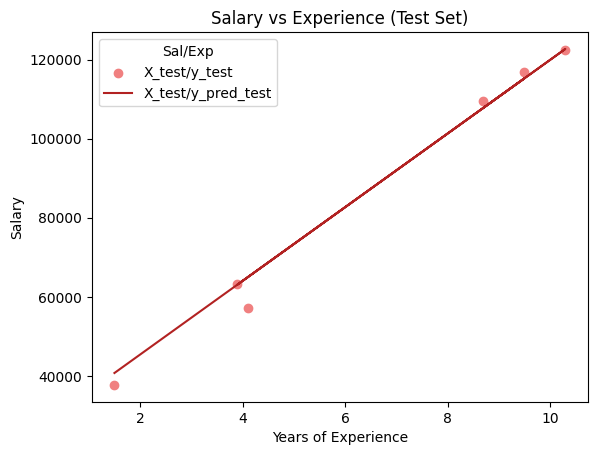

In [24]:
# Visualise prediction on test set
plt.scatter(X_test, y_test, color='lightcoral')
plt.plot(X_test, y_pred_test, color='firebrick')
plt.title('Salary vs Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(['X_test/y_test', 'X_test/y_pred_test'], title='Sal/Exp', loc='best', facecolor='white')
plt.show()

In [25]:
# Coefficient ans Intercept
print(f'Regression Coefficient : {regressor.coef_}')
print(f'Regression Intercept : {regressor.intercept_}')

Regression Coefficient : [[9312.57512673]]
Regression Intercept : [26780.09915063]


In [27]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred_test)
print(f'Mean Squared Error : {mse}')

# R-Squared
r_squared = regressor.score(X_test, y_test)
print(f'R-Squared : {r_squared*100}')

# Adjusted R-Squared
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r_squared = 1 - ( (1 - r_squared) * (n - 1) / (n - p - 1))
print(f'Adjusted R-Squared : {adjusted_r_squared*100}')


Mean Squared Error : 12823412.298126549
R-Squared : 98.8169515729126
Adjusted R-Squared : 98.52118946614075
